<h4  style='color:cyan'>Bibliotecas</h4>

In [502]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
import warnings
warnings.filterwarnings("ignore")

#ajusta as opções de exibição para mostrar todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h2  style='color:cyan'>EDA</h2>

In [445]:
#importar dataset
movie = pd.read_csv('desafio_indicium_imdb.csv')

In [446]:
#verificar as primeiras linhas do dataset
movie.head(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [447]:
#verificando as ultimas linhas do dataset
movie.tail(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [448]:
#verificar tipos de dados
movie.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [449]:
#verificar dados ausentes (missing)
df_ausentes = movie.isnull().sum().to_frame('Contagem de Missing').reset_index().rename(columns={'index':'Movie'})
df_ausentes

,Movie,Contagem de Missing
0,Unnamed: 0,0
1,Series_Title,0
2,Released_Year,0
3,Certificate,101
4,Runtime,0
5,Genre,0
6,IMDB_Rating,0
7,Overview,0
8,Meta_score,157
9,Director,0


In [450]:
#verificando quanitade de observações x colunas
movie.shape

(999, 16)

In [451]:
#colunas com dados ausentes
df_ausentes[df_ausentes['Contagem de Missing'] > 0]

,Movie,Contagem de Missing
3,Certificate,101
8,Meta_score,157
15,Gross,169


<h2  style='color:cyan'>Limpeza dos Dados</h2>


In [452]:
#retirando coluna Unnamed: 0 e Certificate
movie.drop(['Unnamed: 0', 'Certificate'], axis=1, inplace=True)  

In [453]:
#verificando 'PG' na variavel Released_Year como se trata de apenas 1 observação vamos alterar diretamente 
movie[movie['Released_Year'] == 'PG']

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [454]:
#modificando PG pelo ano do filme 1995
movie['Released_Year'] = movie['Released_Year'].replace('PG', '1995')

In [455]:
#Released_Year alterado
movie['Released_Year'] = movie['Released_Year'].astype(int)

In [456]:
#runtime para int64
movie['Runtime'] = movie['Runtime'].str.replace(r'\D+', '', regex=True).astype(int)

In [457]:
#drop na nas observações NaN ref: Gross
movie.dropna(subset=['Gross'], inplace=True, axis=0)

In [458]:
#convertendo Gross para float 
movie['Gross'] = movie['Gross'].str.replace(',','').astype(float)
movie['Gross'] = movie['Gross']*(10**-6)
movie['Gross'] = movie['Gross'].apply(lambda x: f"{x:.6f}")
movie['Gross'] = movie['Gross'].astype(float)

In [459]:
#drop na nas observações NaN ref: Meta_Score
movie.dropna(subset=['Meta_score'], inplace=True, axis=0)

In [460]:
#verificando se há colunas com dados ausentes
movie.isnull().sum()

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [461]:
movie['IMDB_Rating'].value_counts(ascending=True).to_frame('Contagem de Filmes').reset_index()

,IMDB_Rating,Contagem de Filmes
0,9.2,1
1,9.0,3
2,8.9,3
3,8.8,5
4,8.7,5
5,8.6,11
6,8.5,19
7,8.4,20
8,8.3,34
9,8.2,35


In [292]:
#gráfico de dispersão com linha de tendência
fig = px.scatter(movie, x='IMDB_Rating', y='Gross', trendline='ols')
fig.update_layout(title='IMDB_Rating vs Gross')
fig.show()

In [293]:
#gráfico de dispersão com linha de tendência
fig = px.scatter(movie, x='Runtime', y='Gross', trendline='ols')
fig.update_layout(title='Runtime vs Gross')
fig.show()

In [294]:
#gráfico de dispersão com linha de tendência
fig = px.scatter(movie, x='No_of_Votes', y='Gross', trendline='ols')
fig.update_layout(title='No_of_Votes vs Gross')
fig.show()

In [295]:
#gráfico de dispersão com linha de tendência
fig = px.scatter(movie, x='No_of_Votes', y='IMDB_Rating', trendline='ols')
fig.update_layout(title='No_of_Votes vs IMDB_Rating')
fig.show()

In [296]:
#year vs Gross Revenue
fig = px.line(movie[['Released_Year','Gross']].groupby('Released_Year').mean().reset_index(), x='Released_Year', y='Gross',
              line_shape='spline')
fig.update_layout(title='Crescimento médio de Faturamento por Ano')
fig.show()

In [297]:
#selecionando variaveis para realizar um grafico de correlação entre variaveis númericas
var_selec = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
selected_data = movie[var_selec]

In [298]:
#calculando a relação na matriz
corr_matrix = selected_data.corr()

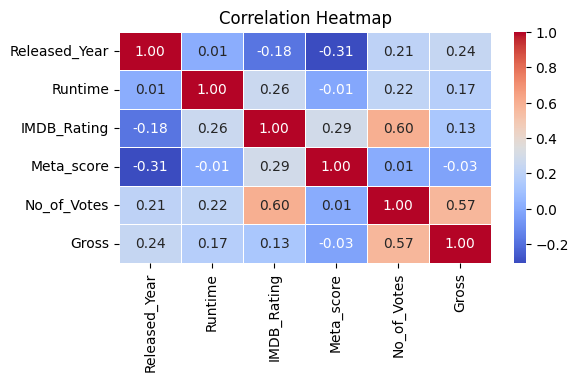

In [299]:
# heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [300]:
#investigando a influência dos diretores no sucesso do filme
diretor_receita = movie.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(10)
fig = px.bar(diretor_receita, x=diretor_receita.values, y=diretor_receita.index, orientation='h')

#atualiza o layout do gráfico
fig.update_layout(title='Top 10 Diretores por Receita Média',
                  xaxis_title='Receita Média',
                  yaxis_title='Diretor')

#mostra o gráfico
fig.show()

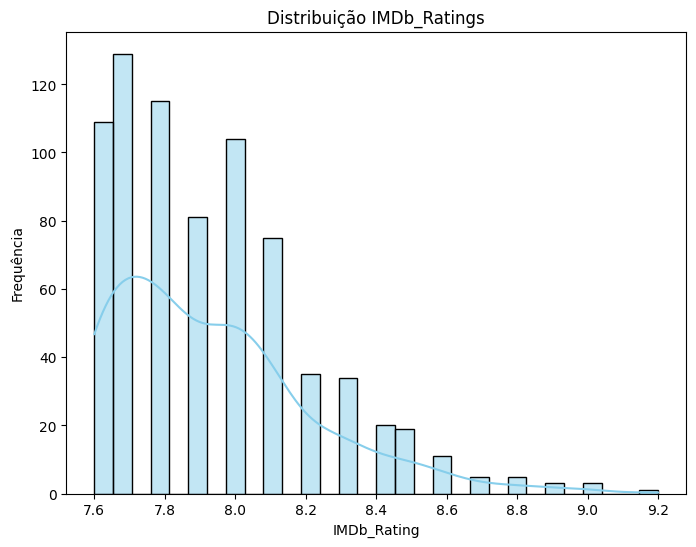

In [301]:
#correlação e distribuição IMDB_Rating
plt.figure(figsize=(8, 6))
sns.histplot(movie['IMDB_Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição IMDb_Ratings')
plt.xlabel('IMDb_Rating')
plt.ylabel('Frequência')
plt.show()

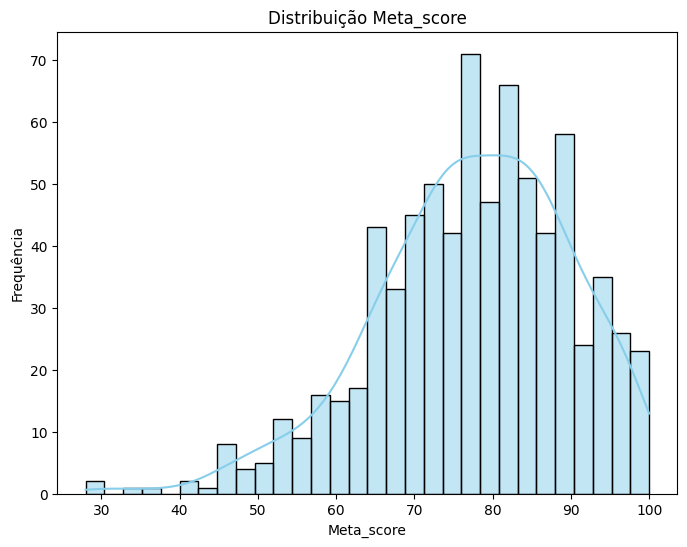

In [302]:
#correlação e distribuição Meta_Score
plt.figure(figsize=(8, 6))
sns.histplot(movie['Meta_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição Meta_score')
plt.xlabel('Meta_score')
plt.ylabel('Frequência')
plt.show()

In [303]:
#melhores filmes por IMDB_Rating
top_filmes = movie.sort_values(by='IMDB_Rating', ascending=False).head(5)

#melhores filmes por Meta_Score
meta_top_filmes = movie.sort_values(by='Meta_score', ascending=False).head(5)

#melhores filmes por Meta_Score
vote_top_filmes = movie.sort_values(by='No_of_Votes', ascending=False).head(5)

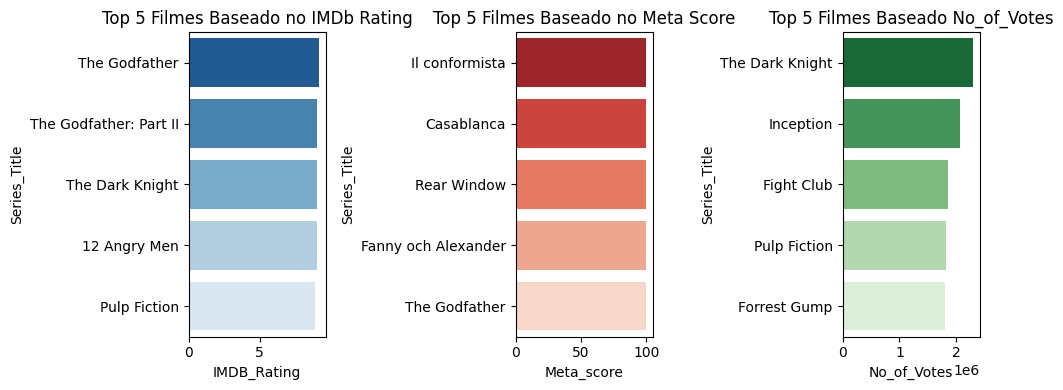

In [304]:
#plotting IMDb Rating
plt.figure(figsize=(10,4))

plt.subplot(1, 3, 1)
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_filmes, palette='Blues_r')
plt.title('Top 5 Filmes Baseado no IMDb Rating')

#plotting Meta score
plt.subplot(1, 3, 2)
sns.barplot(x='Meta_score', y='Series_Title', data=meta_top_filmes, palette='Reds_r')
plt.title('Top 5 Filmes Baseado no Meta Score')

#plotting Meta score
plt.subplot(1, 3, 3)
sns.barplot(x='No_of_Votes', y='Series_Title', data=vote_top_filmes, palette='Greens_r')
plt.title('Top 5 Filmes Baseado No_of_Votes')

plt.tight_layout()
plt.show()

In [305]:
#atores com maiores aparições
filme_star1 = movie['Star1'].value_counts().nlargest(5)
filme_star2 = movie['Star2'].value_counts().nlargest(5)
filme_star3 = movie['Star3'].value_counts().nlargest(5)

In [306]:
#combinando Star1, Star2, Star3
top_atores_combinados = pd.concat([filme_star1, filme_star2, filme_star3], axis=1, keys=['Star 1', 'Star 2', 'Star 3'])

<Figure size 1200x600 with 0 Axes>

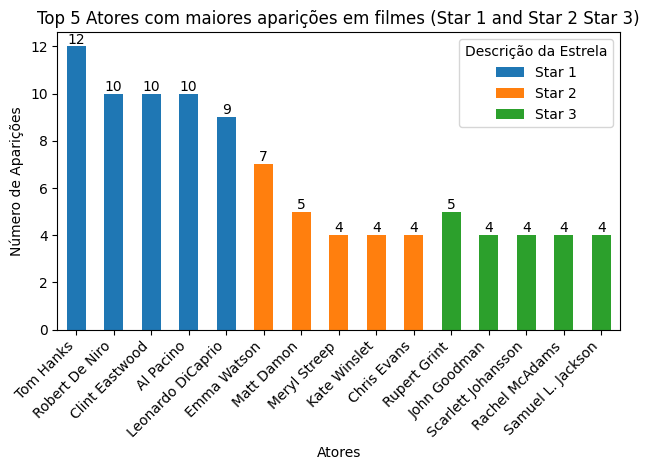

In [307]:
# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
ax = top_atores_combinados.plot(kind='bar', stacked=True)
plt.title('Top 5 Atores com maiores aparições em filmes (Star 1 and Star 2 Star 3)')
plt.xlabel('Atores')
plt.ylabel('Número de Aparições')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Descrição da Estrela')

# Adicionando os números acima das barras
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:  # Verifica se a altura da barra é maior que 0
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

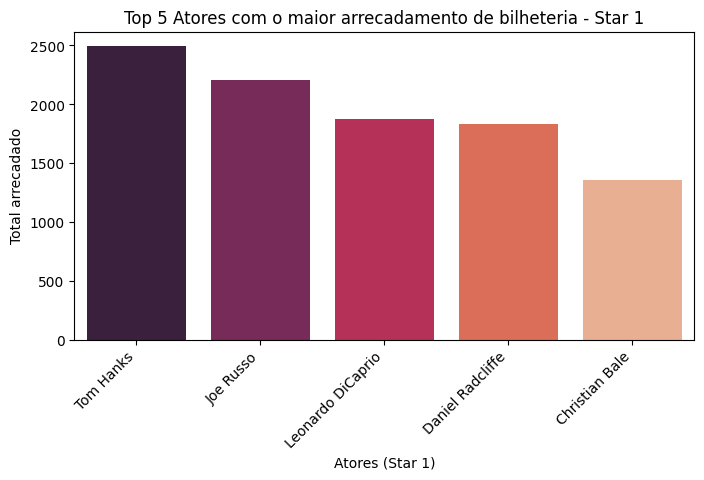

In [308]:
#top 5 Star 1 com maiores arrecadamentos 
top_star_arrecadacao = movie.groupby('Star1')['Gross'].sum().nlargest(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_star_arrecadacao.index, y=top_star_arrecadacao.values, palette='rocket')
plt.title('Top 5 Atores com o maior arrecadamento de bilheteria - Star 1')
plt.xlabel('Atores (Star 1)')
plt.ylabel('Total arrecadado')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

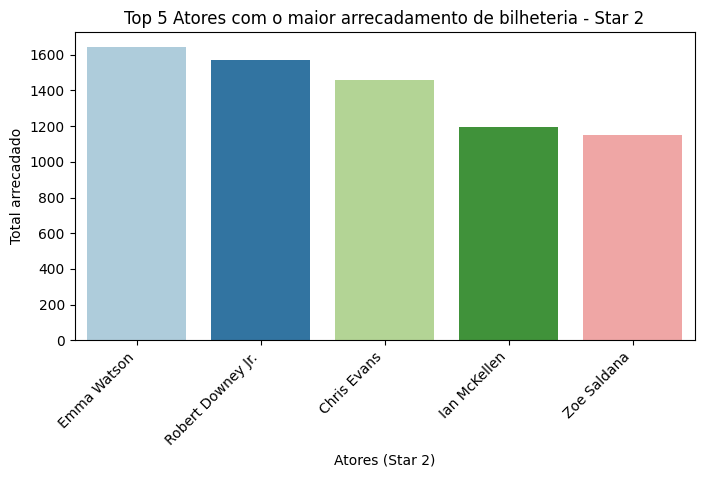

In [309]:
#top 5 Star 2 com maiores arrecadamentos 
top_star2_arrecadacao = movie.groupby('Star2')['Gross'].sum().nlargest(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_star2_arrecadacao.index, y=top_star2_arrecadacao.values, palette='Paired')
plt.title('Top 5 Atores com o maior arrecadamento de bilheteria - Star 2')
plt.xlabel('Atores (Star 2)')
plt.ylabel('Total arrecadado')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

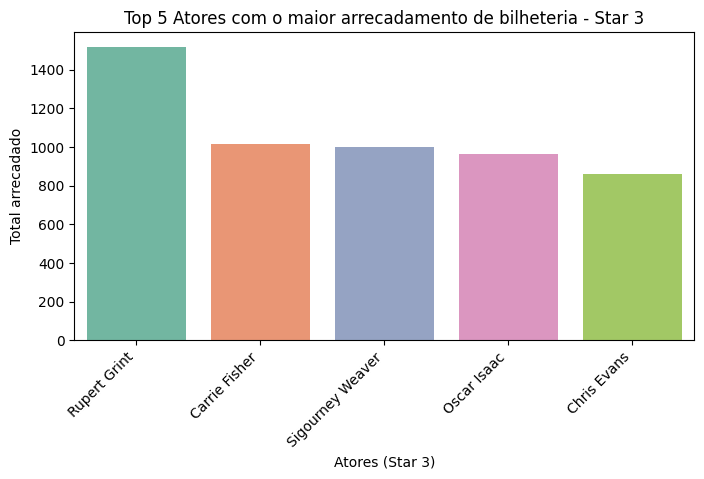

In [310]:
#top 5 Star 3 com maiores arrecadamentos 
top_star3_arrecadacao = movie.groupby('Star3')['Gross'].sum().nlargest(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_star3_arrecadacao.index, y=top_star3_arrecadacao.values, palette='Set2')
plt.title('Top 5 Atores com o maior arrecadamento de bilheteria - Star 3')
plt.xlabel('Atores (Star 3)')
plt.ylabel('Total arrecadado')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

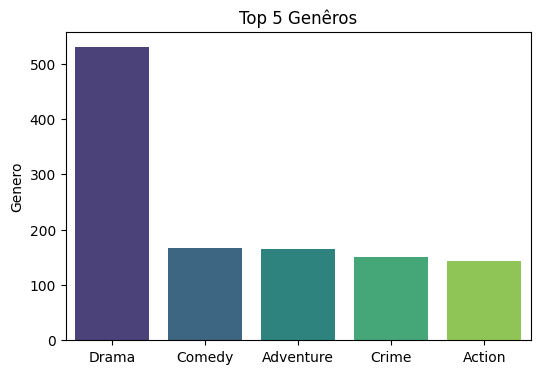

In [311]:
#contando generos dos filmes
genero = []
for x in movie['Genre']:
    for y in x.split(','):
        genero.append(y.strip().capitalize())
        
count = Counter(genero)
count = count.most_common()[:5]
x,y=map(list,zip(*count))

#plotando
fig,axs=plt.subplots(figsize=(6,4))
g=sns.barplot(y=y,x=x , palette='viridis')
g.set_ylabel("Genero")
g.set_title("Top 5 Genêros")
plt.show()

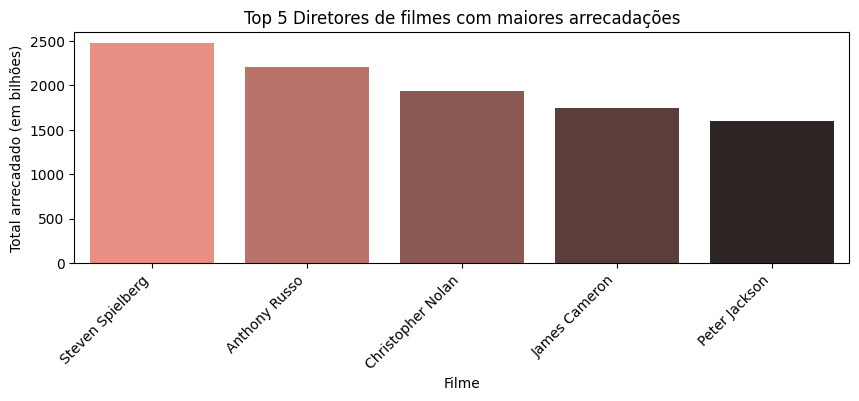

In [312]:
#obtendo os cinco diretores com maior faturamento
diretor_gross = movie.groupby('Director')['Gross'].sum().nlargest(5)

#criando area do plot
plt.figure(figsize=(10,3))
sns.barplot(x=diretor_gross.index, y=diretor_gross.values, order=diretor_gross.index, palette='dark:salmon_r')
plt.title('Top 5 Diretores de filmes com maiores arrecadações')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.xlabel('Filme')
plt.ylabel('Total arrecadado (em bilhões)')
plt.xticks(rotation=45, ha='right')
plt.show()

<h1 style='color:cyan'>Etapa 2</h1>
<p style='color:lightgreen'>2.	Responda também às seguintes perguntas:

- Qual filme você recomendaria para uma pessoa que você não conhece?
- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
- Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?</p>


<h4 style='color: lightgreen'>P: Qual filme você recomendaria para uma pessoa que você não conhece?</h4>

<p style='color: white'>R: Para recomendar um filme para alguém que não conhecemos sem mesmo ter alguma referência de gênero ao qual tal pessoa mais se identifica, podemos escolher filmes que geralmente possui ampla aceitação da critica e conta com boas avaliações, geralmente esses filmes estão em alta ou com uma boa reputação e ou classificação no IMDb. Podemos trazer esse(s) titulo(s) através do código abaixo:</p>

In [313]:
#ordenar o DataFrame pelas colunas 'IMDB_Rating' e 'Gross' em ordem decrescente
top_movies = movie.sort_values(by=['IMDB_Rating', 'Gross'], ascending=False).head(5)

#selecionar as colunas específicas
top_movies = top_movies[['Series_Title', 'Genre', 'Runtime', 'IMDB_Rating']]

#renomear as colunas para a saída desejada
top_movies.columns = ['Nome', 'Gênero', 'Duração', 'IMDB_Rating']

#exibindo o df
top_movies


,Nome,Gênero,Duração,IMDB_Rating
0,The Godfather,"Crime, Drama",175,9.2
1,The Dark Knight,"Action, Crime, Drama",152,9.0
2,The Godfather: Part II,"Crime, Drama",202,9.0
3,12 Angry Men,"Crime, Drama",96,9.0
4,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",201,8.9


<h4 style='color: lightgreen'>P: Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?</h4>

<p style='color: white'>R: Podemos tentar identificar os principais fatores relacionados com a alta expectativa de faturamento, usando a análise de correlação e também empregando um gráfico de dispersão para observar como as variáveis específicas sem relacionam com a receita:</p>

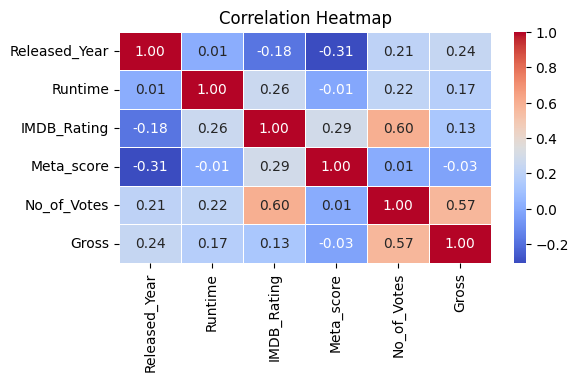

In [314]:
# analisando a correlação das variáveis com a receita
var_selec_fat = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
selected_data_fat = movie[var_selec_fat]

corr_matrix_fat = selected_data_fat.corr()

# heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix_fat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


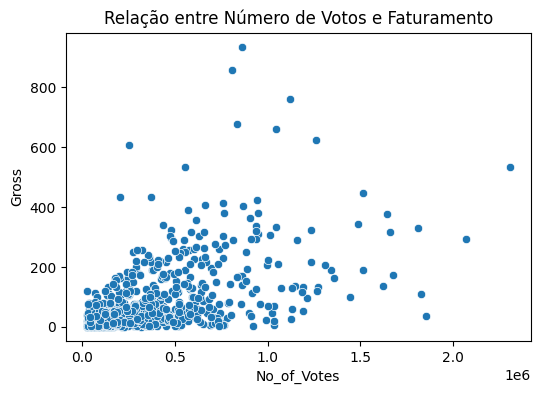

In [315]:
# gráficos de dispersão para ver a relação de algumas variáveis com a receita
plt.figure(figsize=(6,4))
sns.scatterplot(data=movie, x='No_of_Votes', y='Gross')
plt.title('Relação entre Número de Votos e Faturamento')
plt.show()

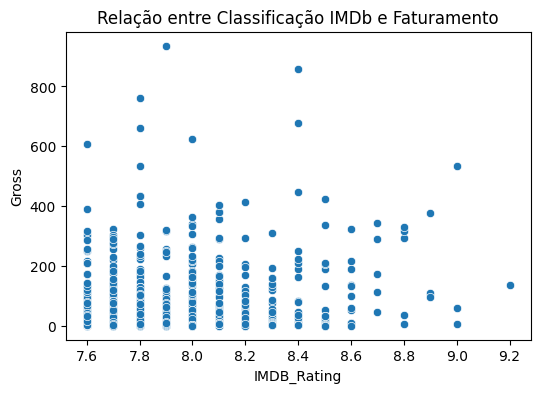

In [316]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=movie, x='IMDB_Rating', y='Gross')
plt.title('Relação entre Classificação IMDb e Faturamento')
plt.show()

<h4 style='color: lightgreen'>P: Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?</h4>

<p style='color: white'>R: Geralmente essa coluna contém uma sinopse do filme, para podermos extrair insghts dessa coluna e inferir o gênero do filme, podemos usar técnicas de processamento de linguagem natural:</p>

In [317]:
#pré-processamento
movie['Overview'] = movie['Overview'].fillna('')

In [318]:
#vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(movie['Overview'])

In [319]:
#inferir gênero do filme
y = movie['Genre']

#dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#treinar um modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#avaliar o modelo
y_pred = model.predict(X_test)

#inferência de gênero de um novo overview
novo_overview = "happiness is his name after getting a dream job he buys a plane"
novo_overview_vectorized = vectorizer.transform([novo_overview])
genero_inferido = model.predict(novo_overview_vectorized)
print(f"O gênero inferido para o novo overview é: {genero_inferido[0]}")

O gênero inferido para o novo overview é: Drama


<h1 style='color:cyan'>Etapa 3</h1>
<p>3.	Explique como você faria a previsão da nota do imdb a partir dos dados. 

- Quais variáveis e/ou suas transformações você utilizou e por quê? 
- Qual tipo de problema estamos resolvendo (regressão, classificação)? 
- Qual modelo melhor se aproxima dos dados e quais seus prós e contras? 
- Qual medida de performance do modelo foi escolhida e por quê?</p>

Para responder essas perguntas faremos um algoritmo que nos auxiliara com as respostas

In [320]:
movie.head(1)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134.966411


In [462]:
#retirando variaveis que não iremos trabalhar
movie.drop(['Series_Title','Overview','Genre'], axis=1, inplace=True)

In [463]:
#instanciando o LabelEncoder
lb = LabelEncoder()
scaler = MinMaxScaler()

In [465]:
#selecionar as colunas categóricas
categorical_columns = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']

In [466]:
#aplicar o LabelEncoder para cada coluna categórica
for column in categorical_columns:
    movie[column] = lb.fit_transform(movie[column])

In [467]:
features = movie.drop('IMDB_Rating', axis=1)
target = movie['IMDB_Rating']

In [468]:
X_treino, X_teste, y_treino, y_teste = train_test_split(features, target, test_size = 0.3, random_state= 42)

In [469]:
X_treino_normalizadas = scaler.fit_transform(X_treino)
X_teste_normalizadas = scaler.transform(X_teste)

In [470]:
ln = LinearRegression()
ln.fit(X_treino_normalizadas, y_treino)

LinearRegression()

In [471]:
print(f'Linear Regressor Score : {ln.score(X_treino_normalizadas, y_treino)}')

Linear Regressor Score : 0.5739507818503291


In [472]:
previsoes = ln.predict(X_teste_normalizadas)

In [473]:
mse = mean_squared_error(y_teste, previsoes)
r_score = r2_score(y_teste, previsoes)
print(f'MSE : {mse}\nr2_score : {r_score * 100:.2f}%')

MSE : 0.03941507929922833
r2_score : 53.28%


<h4 style='color: lightgreen'>P: Quais variáveis e/ou suas transformações você utilizou e por quê?</h4>

<p style='color: white'>R: Foram excluidas apenas as variaveis ['Series_Title','Overview'] para transformar as variaveis categoricas foi utilizado o LabelEncoder() e após foi utilizado o MinMaxScaler() para deixa-las na mesma escala de valores.</p>

<h4 style='color: lightgreen'>P: Qual tipo de problema estamos resolvendo (regressão, classificação)? </h4>

<p style='color: white'>R: Problema em questão (Regressão) pois estamos buscando uma variavek target continua IMDB_Rating</p>

<h4 style='color: lightgreen'>P: Qual modelo melhor se aproxima dos dados e quais seus prós e contras?  </h4>

<p style='color: white'>R: O modelo que melhor performou foi o nosso baseline LinearRegressor.</p>
<p style='color: white'>Prós: Simples, fácil de interpretar, rápida.</p>
<p style='color: white'>Contras: Pode não capturar relações não lineares.</p>

<h4 style='color: lightgreen'>P: Qual medida de performance do modelo foi escolhida e por quê? </h4>

<p style='color: white'>R: Foi escolhidas duas medidas de performance:</p>
<ul style='color: white'>Mean Squared Error (MSE):</ul>
<ul style='color: white'>Mede a média dos quadrados dos erros (diferença entre valores reais e previstos).</ul>
<ul style='color: white'>penaliza grandes erros mais severamente.</ul>
<br>
<ul style='color: white'>R² Score:</ul>
<ul style='color: white'>Mede a proporção da variabilidade dos dados que é explicada pelo modelo.</ul>
<ul style='color: white'>Útil para entender a performance geral do modelo.</ul>

<h1 style='color:cyan'>Etapa 4</h1>

In [475]:
#dados do novo filme
new_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

In [476]:
#converter os dados para um DataFrame
new_movie_df = pd.DataFrame([new_movie])

In [477]:
#retirando variaveis que não iremos trabalhar
new_movie_df.drop(['Series_Title','Overview','Certificate','Genre'], axis=1, inplace=True)

In [478]:
#convertendo Gross para float 
new_movie_df['Gross'] = new_movie_df['Gross'].str.replace(',','').astype(float)
new_movie_df['Gross'] = new_movie_df['Gross']*(10**-6)
new_movie_df['Gross'] = new_movie_df['Gross'].apply(lambda x: f"{x:.6f}")
new_movie_df['Gross'] = new_movie_df['Gross'].astype(float)

In [479]:
#runtime para int64
new_movie_df['Runtime'] = new_movie_df['Runtime'].str.replace(r'\D+', '', regex=True).astype(int)

In [480]:
#Released_Year alterado
new_movie_df['Released_Year'] = new_movie_df['Released_Year'].astype(int)

In [482]:
#selecionar as colunas categóricas
new_movie_columns = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']

In [490]:
#aplicar o LabelEncoder para cada coluna categórica / padronizando / e prevendo nota
for column in new_movie_columns:
    new_movie_df[column] = lb.fit_transform(new_movie_df[column])
    
new_data_ = scaler.fit_transform(new_movie_df)
previsao_nota_new = ln.predict(new_data_)

In [501]:
#print do resultado com a nota IMDB_Rating do novo filme
print(f'A nota prevista para o filme (The Shawshank Redemption) : {previsao_nota_new[0]:.1f}')

A nota prevista para o filme (The Shawshank Redemption) : 7.6


<h1 style='color:cyan'>Etapa 5</h1>
<p style='color: white'>Salve o modelo desenvolvido no formato .pkl</p>

In [503]:
#salvar o modelo no formato .pkl
joblib_file = "linearRegressor.pkl"
joblib.dump(model, joblib_file)

print(f"O modelo foi salvo como {joblib_file}")

O modelo foi salvo como linearRegressor.pkl
